In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.7 MB/s eta 0:00:00


In [ ]:
#import libraries
import pandas as pd
import random
from faker import Faker
import numpy as np
from datetime import datetime

In [ ]:
#initialize Faker
fake = Faker()
Faker.seed(42)
random.seed(42)

In [ ]:
#Define coffee menu
menu = [
    # Core
    {"drink": "Latte", "price": 4.5, "season": "core", "category": "Espresso"},
    {"drink": "Cappuccino", "price": 4.0, "season": "core", "category": "Espresso"},
    {"drink": "Espresso", "price": 3.0, "season": "core", "category": "Espresso"},
    {"drink": "Americano", "price": 3.5, "season": "core", "category": "Espresso"},
    {"drink": "Chai Latte", "price": 4.5, "season": "core", "category": "Tea"},
    {"drink": "Cold Brew", "price": 5.0, "season": "core", "category": "Cold Coffee"},
    {"drink": "Iced Latte", "price": 5.0, "season": "core", "category": "Cold Coffee"},

    # Summer
    {"drink": "Iced Matcha", "price": 5.5, "season": "summer", "category": "Tea"},
    {"drink": "Frozen Mocha", "price": 6.0, "season": "summer", "category": "Blended"},
    {"drink": "Peach Tea Refresher", "price": 4.5, "season": "summer", "category": "Tea"},

    # Winter
    {"drink": "Peppermint Mocha", "price": 5.5, "season": "winter", "category": "Espresso"},
    {"drink": "Gingerbread Latte", "price": 5.0, "season": "winter", "category": "Espresso"},
    {"drink": "Hot Chocolate", "price": 3.5, "season": "winter", "category": "Non-Coffee"},
]


In [ ]:
def is_in_season(season_tag, month):
    if season_tag == "core":
        return True
    elif season_tag == "summer" and month in [6, 7, 8]:
        return True
    elif season_tag == "winter" and month in [11, 12, 1]:
        return True
    return False

In [ ]:
0#Generate fake transactions
num_records = 2500
transactions = []

for _ in range(num_records):
    dt = fake.date_time_between(start_date='-90d', end_date='now')
    month = dt.month

    # Filter for available drinks this month
    available_menu = [d for d in menu if is_in_season(d["season"], month)]
    drink = random.choice(available_menu)
    quantity = random.randint(1, 3)

    transactions.append({
    "transaction_id": fake.uuid4(),
    "datetime": dt,
    "month": dt.strftime("%B"),
    "hour": dt.strftime("%I %p"),
    "day_of_week": dt.strftime("%A"),
    "drink": drink["drink"],
    "category": drink["category"],
    "season": drink["season"],
    "price_per_unit": drink["price"],
    "quantity": quantity,
    "total_amount": round(drink["price"] * quantity, 2)
})


In [ ]:
#Convert to DataFrame
df = pd.DataFrame(transactions)

In [ ]:
df.head(200)

,transaction_id,datetime,month,hour,day_of_week,drink,category,season,price_per_unit,quantity,total_amount
0,3eb13b90-4668-4257-bdd6-40fb06671ad1,2025-05-09 12:37:22.784808,May,12 PM,Friday,Cold Brew,Cold Coffee,core,5.0,1,5.0
1,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,2025-04-02 01:35:46.699845,April,01 AM,Wednesday,Latte,Espresso,core,4.5,3,13.5
2,0822e8f3-6c03-4199-972a-846916419f82,2025-06-01 06:34:08.318473,June,06 AM,Sunday,Chai Latte,Tea,core,4.5,1,4.5
3,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2025-03-15 15:49:23.178350,March,03 PM,Saturday,Cappuccino,Espresso,core,4.0,1,4.0
4,b38a088c-a65e-4389-b74d-0fb132e70629,2025-03-15 08:46:43.700262,March,08 AM,Saturday,Cold Brew,Cold Coffee,core,5.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...
195,ab0e664e-9c3e-42d5-91e1-aa9676f72255,2025-04-03 22:12:22.103149,April,10 PM,Thursday,Cappuccino,Espresso,core,4.0,3,12.0
196,533420e6-d9d8-4b8d-be8a-dee70758e201,2025-04-16 02:04:40.828901,April,02 AM,Wednesday,Cold Brew,Cold Coffee,core,5.0,2,10.0
197,4223623b-cc3e-4dde-9ad5-cf06364d7c87,2025-03-29 08:14:06.729258,March,08 AM,Saturday,Cappuccino,Espresso,core,4.0,2,8.0
198,e14eb70d-b380-473a-989d-9d4ae15ca666,2025-04-12 14:35:34.844445,April,02 PM,Saturday,Americano,Espresso,core,3.5,1,3.5


from matplotlib import pyplot as plt
_df_0['price_per_unit'].plot(kind='hist', bins=20, title='price_per_unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['total_amount'].plot(kind='hist', bins=20, title='total_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('day_of_week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='price_per_unit', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='quantity', y='total_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['price_per_unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('month')):
  _plot_series(series, series_name, i)
  fig.legend(title='month', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('price_per_unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['price_per_unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('day_of_week')):
  _plot_series(series, series_name, i)
  fig.legend(title='day_of_week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('price_per_unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['price_per_unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('price_per_unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['price_per_unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('season')):
  _plot_series(series, series_name, i)
  fig.legend(title='season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('price_per_unit')

from matplotlib import pyplot as plt
_df_13['price_per_unit'].plot(kind='line', figsize=(8, 4), title='price_per_unit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['total_amount'].plot(kind='line', figsize=(8, 4), title='total_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['day_of_week'].value_counts()
    for x_label, grp in _df_16.groupby('month')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('month')
_ = plt.ylabel('day_of_week')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in _df_17.groupby('day_of_week')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('day_of_week')
_ = plt.ylabel('category')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['season'].value_counts()
    for x_label, grp in _df_18.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('season')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['month'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='price_per_unit', y='month', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['day_of_week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='price_per_unit', y='day_of_week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='price_per_unit', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='price_per_unit', y='season', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

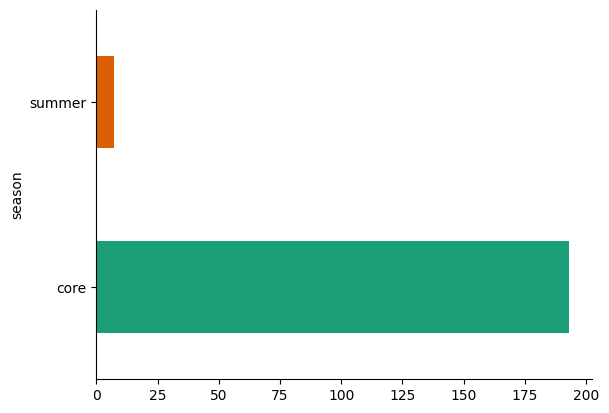

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

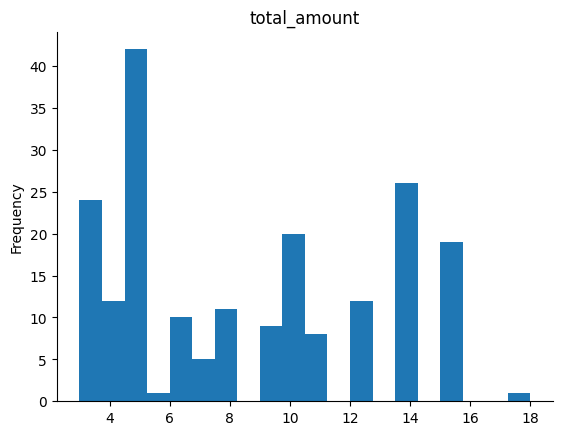

In [ ]:
from matplotlib import pyplot as plt
_df_2['total_amount'].plot(kind='hist', bins=20, title='total_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

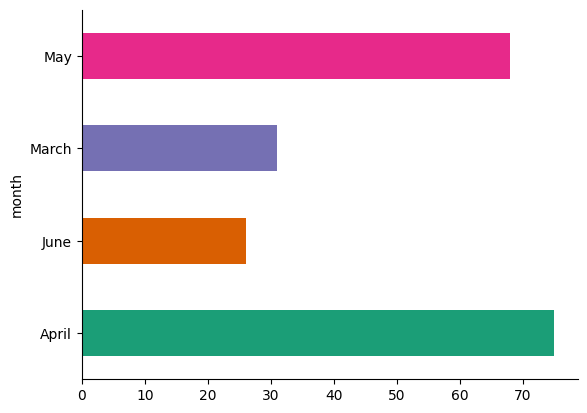

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.to_csv("expanded_coffee_shop_transactions.csv", index=False)